<a href="https://colab.research.google.com/github/Phund4Bot/DZ/blob/main/Lab3algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 5.
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы Попов Александр Иванович БВТ2203
***

### Задание

1.  Реализовать алгоритмы поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа.

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса.

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



In [1]:
!pip3 install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.8 MB/s eta 0:00:00


### Выполнение:

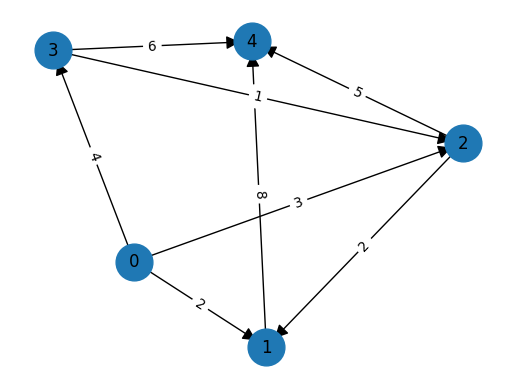

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time


def printGraph(adjacency_matrix):
    # Создаем пустой граф
    G = nx.DiGraph()  # Используем DiGraph для направленного графа

    # Добавляем вершины
    G.add_nodes_from(range(len(adjacency_matrix)))

    # Добавляем рёбра с весами
    for i in range(len(adjacency_matrix)):
        for j in range(len(adjacency_matrix[i])):
            if adjacency_matrix[i][j] > 0:
                G.add_edge(i, j, weight=adjacency_matrix[i][j])

    # Рисуем граф
    pos = nx.spring_layout(G)  # Позиционируем вершины
    labels = {i: i for i in G.nodes()}  # Лейблы вершин
    weights = nx.get_edge_attributes(G, 'weight')  # Веса рёбер

    # Рисуем вершины
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # Рисуем направленные рёбра
    nx.draw_networkx_edges(G, pos, arrows=True, arrowsize=20)

    # Рисуем лейблы вершин
    nx.draw_networkx_labels(G, pos, labels)

    # Рисуем веса рёбер
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)

    # Показываем граф
    plt.axis('off')
    plt.show()


def readGraph(path):
    with open(path, "r") as file:
      return [[int(num) for num in line.split()] for line in file]

def run_algorithms_with_files(algorithms, files):
    results = {}

    for algorithm in algorithms:
        algorithm_results = []
        for file in files:
            times = []
            for _ in range(3):
                start_time = time.time()
                if(algorithm == yen_k_shortest_paths):
                   algorithm(readGraph(file), 0, 4, 1)
                else:
                   algorithm(readGraph(file), 0, 4)
                end_time = time.time()
                execution_time = end_time - start_time
                times.append(execution_time)
            algorithm_results.append(sum(times) / len(times))
        results[algorithm.__name__] = algorithm_results

    return results

def plot_results(results, files):
    plt.figure(figsize=(10, 6))

    for algorithm, times in results.items():
        plt.plot(files, times, marker='o', label=algorithm)

    plt.xlabel('Files')
    plt.ylabel('Time')
    plt.title('Time of Algorithms')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

adjacency_matrix = np.array(readGraph("adjacency_matrix_small.txt"))
printGraph(adjacency_matrix)
# adjacency_matrix = np.array(readGraph("adjacency_matrix_middle.txt"))
# printGraph(adjacency_matrix)
# adjacency_matrix = np.array(readGraph("adjacency_matrix_big.txt"))
# printGraph(adjacency_matrix)


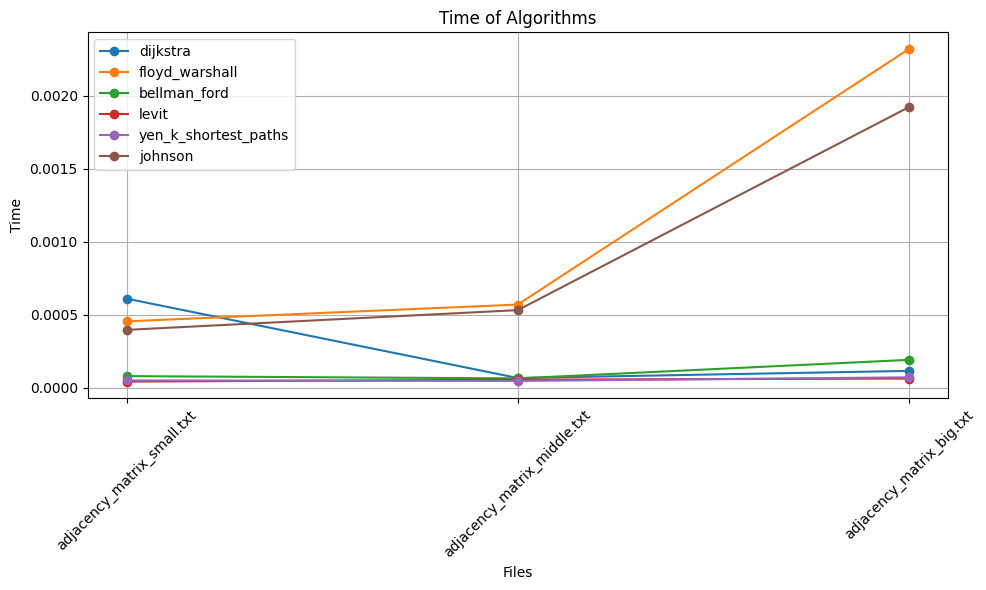

In [39]:
param_values = ["adjacency_matrix_small.txt", "adjacency_matrix_middle.txt", "adjacency_matrix_big.txt"]
alg = [dijkstra, floyd_warshall, bellman_ford, levit, yen_k_shortest_paths, johnson]
result = run_algorithms_with_files(alg, param_values)
plot_results(result, param_values)



In [21]:
def dijkstra(matrix, start, end):
    num_vertices = len(matrix)
    visited = [False] * num_vertices
    distance = [float('inf')] * num_vertices
    distance[start] = 0

    for _ in range(num_vertices):
        min_distance = float('inf')
        min_index = -1
        for v in range(num_vertices):
            if not visited[v] and distance[v] < min_distance:
                min_distance = distance[v]
                min_index = v

        visited[min_index] = True
        if min_index == end:
            break

        for v in range(num_vertices):
            if not visited[v] and matrix[min_index][v] > 0:
                new_distance = distance[min_index] + matrix[min_index][v]
                if new_distance < distance[v]:
                    distance[v] = new_distance

    return distance[end]

shortest_distance = dijkstra(adjacency_matrix, 0, 4)
print("Кратчайшее расстояние от вершины", 0, "до вершины", 4, ":", shortest_distance)

Кратчайшее расстояние от вершины 0 до вершины 4 : 8


In [23]:
def floyd_warshall(matrix, start, end):
    num_vertices = len(matrix)
    distances = np.copy(matrix)

    # Заменяем нули на бесконечность
    distances[distances == 0] = 9999999999

    for k in range(num_vertices):
        for i in range(num_vertices):
            for j in range(num_vertices):
                distances[i][j] = min(distances[i][j], distances[i][k] + distances[k][j])

    # Восстанавливаем бесконечные значения
    distances[distances == 9999999999] = 0

    return distances[start][end]

shortest_distance = floyd_warshall(adjacency_matrix, 0, 4)
print("Кратчайшее расстояние от вершины", 0, "до вершины", 4, ":", shortest_distance)

Кратчайшее расстояние от вершины 0 до вершины 4 : 8


In [24]:
def bellman_ford(matrix, start, end):
    num_vertices = len(matrix)
    distances = [float('inf')] * num_vertices
    distances[start] = 0

    for _ in range(num_vertices - 1):
        for u in range(num_vertices):
            for v in range(num_vertices):
                if matrix[u][v] != 0:  # Если ребро существует
                    if distances[u] + matrix[u][v] < distances[v]:
                        distances[v] = distances[u] + matrix[u][v]

    # Проверка наличия отрицательных циклов
    for u in range(num_vertices):
        for v in range(num_vertices):
            if matrix[u][v] != 0:
                if distances[u] + matrix[u][v] < distances[v]:
                    return "Граф содержит отрицательный цикл"

    return distances[end]

shortest_distances = bellman_ford(adjacency_matrix, 0, 4)
print("Кратчайшее расстояние от вершины", 0, "до вершины", 4, ":", shortest_distance)


Кратчайшее расстояние от вершины 0 до вершины 4 : 8


In [25]:
from collections import deque

def levit(adjacency_matrix, start, end):
    num_vertices = len(adjacency_matrix)
    distances = [float('inf')] * num_vertices
    distances[start] = 0

    queue = deque([start])
    processed = [False] * num_vertices
    processed[start] = True

    while queue:
        u = queue.popleft()
        processed[u] = False
        for v in range(num_vertices):
            if adjacency_matrix[u][v] != 0:
                if distances[u] + adjacency_matrix[u][v] < distances[v]:
                    distances[v] = distances[u] + adjacency_matrix[u][v]
                    if not processed[v]:
                        if distances[v] < distances[queue[0]] if queue else float('inf'):
                            queue.appendleft(v)
                        else:
                            queue.append(v)
                        processed[v] = True

    return distances

shortest_distances = levit(adjacency_matrix, 0, 4)
print("Кратчайшее расстояние от вершины", 0, "до вершины", 4, ":", shortest_distance)


Кратчайшее расстояние от вершины 0 до вершины 4 : 8


In [26]:
import numpy as np
import math

def johnson(graph, num1, num2):
    # Добавляем фиктивную вершину и ребра из нее ко всем остальным вершинам с весом 0
    n = len(graph)
    augmented_graph = np.zeros((n+1, n+1))
    augmented_graph[:n, :n] = graph
    for i in range(n):
        augmented_graph[n][i] = 0

    # Используем алгоритм Беллмана-Форда для поиска кратчайших путей от фиктивной вершины до всех остальных
    h = bellman_ford_h(augmented_graph, n)

    if h is None:
        return None  # Граф содержит отрицательный цикл

    # Коррекция весов ребер
    for i in range(n):
        for j in range(n):
            if graph[i][j] != math.inf:
                augmented_graph[i][j] += h[i] - h[j]

    # Используем алгоритм Дейкстры для каждой вершины
    shortest_paths = np.zeros((n+1, n+1))
    for i in range(n):
        shortest_paths[i] = dijkstra_h(augmented_graph, i)

    # Возвращаем кратчайшие пути
    for i in range(n):
        for j in range(n):
            shortest_paths[i][j] += h[j] - h[i]

    return shortest_paths

def bellman_ford_h(graph, source):
    n = len(graph)
    dist = [math.inf] * n
    dist[source] = 0

    for _ in range(n - 1):
        for u in range(n):
            for v in range(n):
                if graph[u][v] != math.inf:
                    if dist[u] + graph[u][v] < dist[v]:
                        dist[v] = dist[u] + graph[u][v]

    # Проверка наличия отрицательного цикла
    for u in range(n):
        for v in range(n):
            if graph[u][v] != math.inf:
                if dist[u] + graph[u][v] < dist[v]:
                    return None  # Граф содержит отрицательный цикл

    return dist

def dijkstra_h(graph, source):
    n = len(graph)
    dist = [math.inf] * n
    visited = [False] * n
    dist[source] = 0

    for _ in range(n):
        u = min_distance(dist, visited)
        visited[u] = True
        for v in range(n):
            if not visited[v] and graph[u][v] and dist[u] != math.inf and dist[u] + graph[u][v] < dist[v]:
                dist[v] = dist[u] + graph[u][v]

    return dist

def min_distance(dist, visited):
    min_dist = math.inf
    min_index = -1
    n = len(dist)
    for v in range(n):
        if dist[v] < min_dist and not visited[v]:
            min_dist = dist[v]
            min_index = v
    return min_index

shortest_paths = johnson(readGraph('adjacency_matrix_big.txt'), 0, 4)
if shortest_paths is not None:
    print("Shortest Paths:")
    for row in shortest_paths:
        print(row)
else:
    print("Graph contains a negative cycle.")


Shortest Paths:
[ 0.  1.  2.  3.  4.  5.  4.  5.  3.  6. inf]
[ 6.  0.  4.  2.  5.  8.  3.  6.  4.  5. inf]
[ 6.  7.  0.  3.  2.  5.  5.  3.  7.  4. inf]
[ 4.  5.  6.  0.  8.  9.  8.  5.  7.  3. inf]
[ 4.  5.  4.  1.  0.  6.  3.  1.  5.  2. inf]
[ 5.  6.  5.  4.  7.  0.  2.  6.  4.  5. inf]
[ 5.  5.  3.  2.  5.  6.  0.  4.  2.  3. inf]
[ 8.  5.  3.  4.  5.  5.  7.  0.  9.  7. inf]
[ 5.  3.  7.  5.  5.  4.  6.  4.  0.  7. inf]
[inf inf inf inf inf inf inf inf inf  0. inf]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [29]:
import heapq

def yen_k_shortest_paths(graph, start, end, K):
    A = dijkstra_help(graph, start, end)
    shortest_path = extract_shortest_path(graph, A, start, end)
    all_shortest_paths = [shortest_path]

    candidates = []
    for k in range(1, K):
        for i in range(len(all_shortest_paths[-1]) - 1):
            spur_node = all_shortest_paths[-1][i]
            root_path = all_shortest_paths[-1][:i+1]

            edges_removed = remove_edges(graph, all_shortest_paths, i)

            for path in all_shortest_paths:
                if root_path == path[:i+1]:
                    graph[path[i]][path[i+1]] = float('inf')

            spur_path = dijkstra_help(graph, spur_node, end)

            if spur_path[end] != float('inf'):
                total_path = root_path[:-1] + extract_shortest_path(graph, spur_path, spur_node, end)
                heapq.heappush(candidates, total_path)

            for u, v, weight in edges_removed:
                graph[u][v] = weight

        if not candidates:
            break

        all_shortest_paths.append(heapq.heappop(candidates))

    return all_shortest_paths

def dijkstra_help(graph, start, end):
    n = len(graph)
    visited = [False] * n
    dist = [float('inf')] * n
    dist[start] = 0

    for _ in range(n):
        u = min_distance(dist, visited)
        visited[u] = True

        for v in range(n):
            if not visited[v] and graph[u][v] and dist[u] + graph[u][v] < dist[v]:
                dist[v] = dist[u] + graph[u][v]

    return dist

def min_distance(dist, visited):
    min_dist = float('inf')
    min_index = -1

    for i, d in enumerate(dist):
        if not visited[i] and d < min_dist:
            min_dist = d
            min_index = i

    return min_index

def extract_shortest_path(graph, distances, start, end):
    path = [end]
    while end != start:
        for i in range(len(distances)):
            if distances[end] == distances[i] + graph[i][end]:
                path.append(i)
                end = i
                break
    return list(reversed(path))

def remove_edges(graph, paths, depth):
    edges_removed = []
    for path in paths:
        if len(path) > depth+1:
            u = path[depth]
            v = path[depth+1]
            weight = graph[u][v]
            edges_removed.append((u, v, weight))
            graph[u][v] = float('inf')
    return edges_removed



start_node = 0
end_node = 4
K = 1

shortest_paths = yen_k_shortest_paths(readGraph('adjacency_matrix_small.txt'), start_node, end_node, K)
print("K-Shortest Paths:")
for path in shortest_paths:
    print(path)


K-Shortest Paths:
[0, 2, 4]


### Вывод